In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_diabetes = pd.DataFrame(X_scaled, columns=diabetes.feature_names)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {silhouette_kmeans}")

Silhouette Score for K-Means: 0.15326106959171545


In [ ]:
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

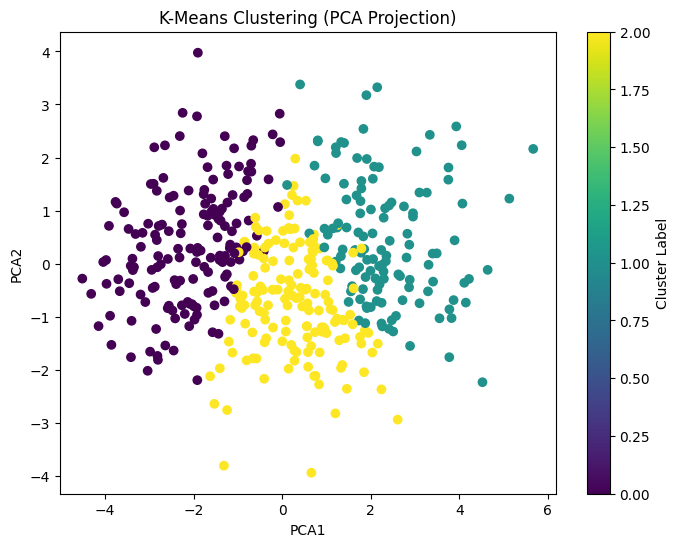

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering (PCA Projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster Label')
plt.show()